In [1]:
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
from matplotlib.text import Text, Annotation
from matplotlib.offsetbox import TextArea, DrawingArea
import numpy as np

241.625
100


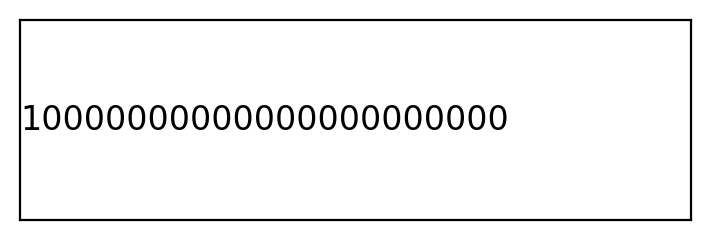

In [50]:
%config InlineBackend.figure_format = "retina"
fig = plt.figure(figsize=(1, 1), dpi=100)
ax = fig.add_axes([0, 0, 1 ,1])
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
renderer = fig.canvas.get_renderer()

# t = ax.annotate("a long text that extent beyond the canvas", 
#                 xy=(0, 0.5), xytext=(0.2, 0.5), va="center",
#                arrowprops=dict(arrowstyle="-")
#                )
# bbox = t.get_tightbbox(renderer)
# x_extent = bbox.xmax - bbox.xmin
# print("Anno x", x_extent / 72)

t = ax.text(0, 0.5, "10000000000000000000000", va="center", fontsize=12, transform=ax.transAxes)

bbox = t.get_window_extent(renderer)
x_extent = bbox.xmax - bbox.xmin
print(x_extent)
plt.close(fig)
print(fig.dpi)
fig = plt.figure(num="asdfasd", figsize=(x_extent / 72, 1), dpi=100)
ax = fig.add_axes([0, 0, 1 ,1])
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
t = ax.text(0, 0.5, "10000000000000000000000", va="center", fontsize=12, transform=ax.transAxes)

In [44]:
import matplotlib as mpl

In [46]:
mpl.rcParams['figure.dpi'] = 150

In [78]:
fig.dpi

100.0

In [61]:
t.get_children()

[]

In [50]:
from hmr import Reloader
import heatgraphy as hg

hg = Reloader(hg)

In [51]:
labels = np.arange(0, 10, 1).astype(str)

In [53]:
hg.Labels(labels).render()

TypeError: RenderPlan.render() missing 1 required positional argument: 'axes'

expected an indented block after 'if' statement on line 289 (base.py, line 292)
spec not found for the module 'heatgraphy._planner'
cannot import name 'AnnoLabels' from 'heatgraphy.plotter' (C:\Users\Milk\Projects\heatgraphy\heatgraphy\plotter\__init__.py)


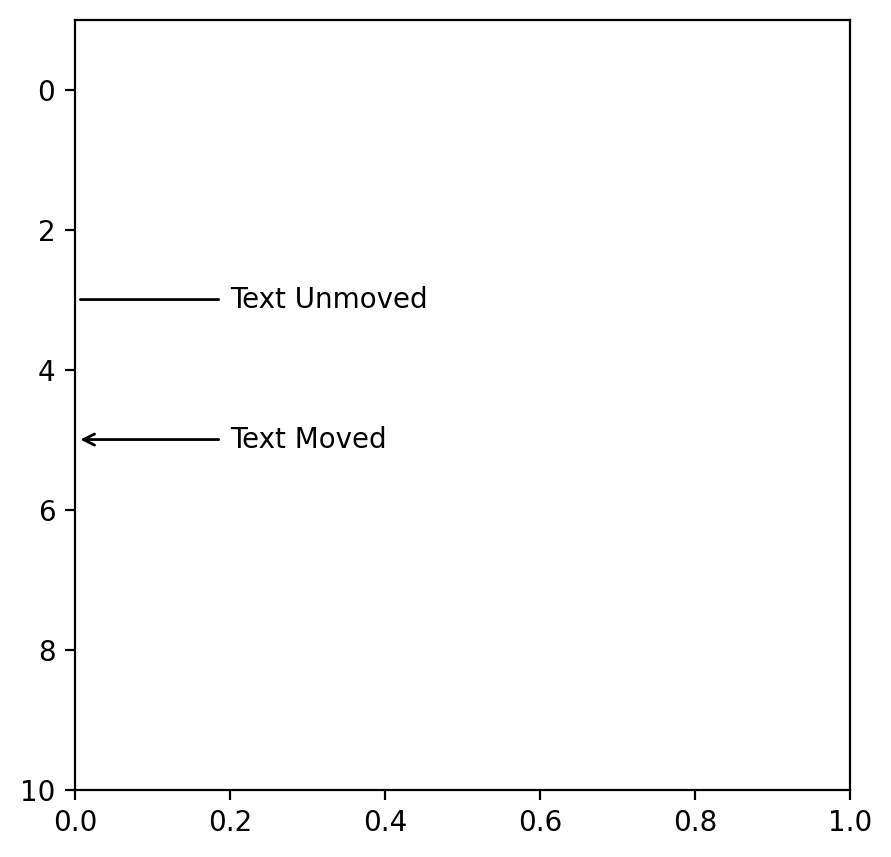

In [67]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.annotate(f"Text Moved",
            xy=(0, 5),
            xytext=(0.2, 5),
            va="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=-180,angleB=0,armA=20,armB=20,rad=0",
                            relpos=(0, 0.5)),
           )

ax.annotate(f"Text Unmoved", xy=(0, 3), xytext=(0.2, 3), va="center",
            arrowprops=dict(arrowstyle="-",
                            relpos=(0, 0.5)),
           )
ax.set_ylim(-1, 10)
ax.invert_yaxis()

Text display coord: 80.0 237.6
Text bbox: Bbox(x0=80.0, y0=230.6, x1=190.875, y1=244.6)
[ 0.         -0.03787879]


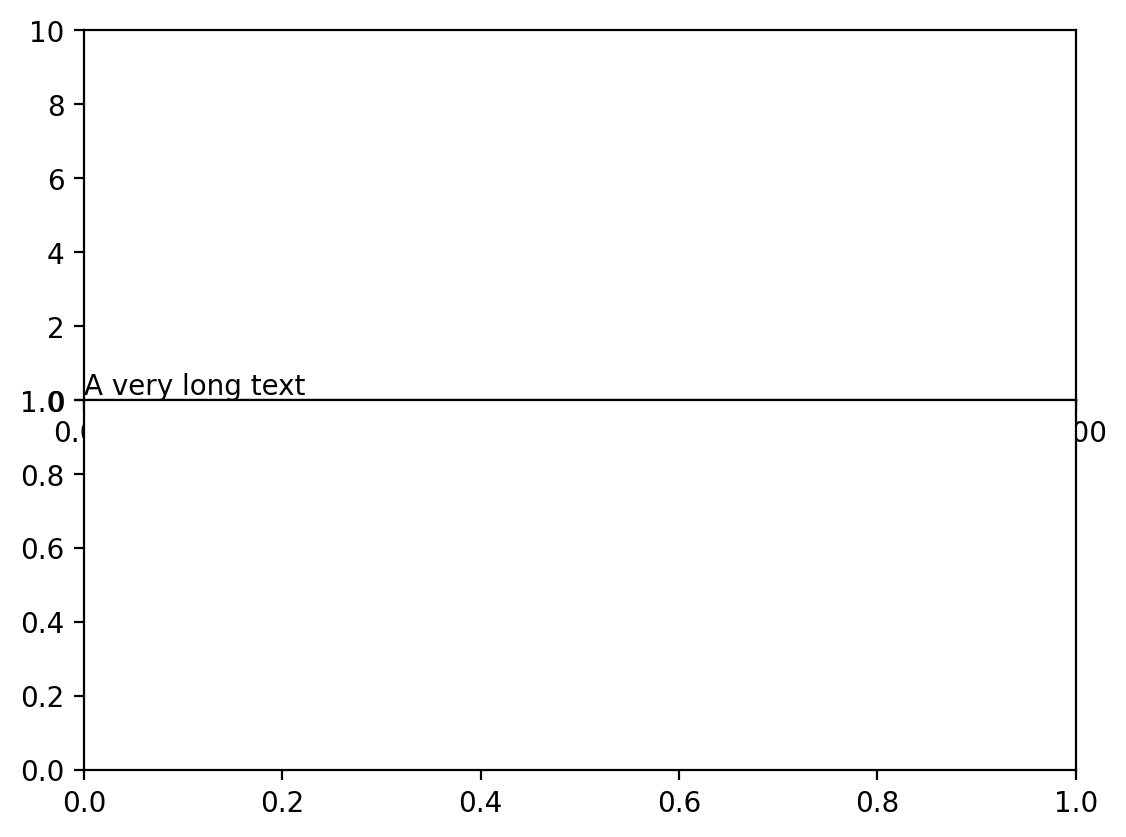

In [68]:
fig, axes = plt.subplots(2, 1, gridspec_kw=dict(hspace=0))
ax= axes[0]
text = ax.text(0, 0, "A very long text", va="center")
ax.set_ylim(0, 10)
ax.set_xlim(0, 2)
#ax.set_axis_off()

x, y = text.get_position()
x = ax.convert_xunits(x)
y = ax.convert_yunits(y)
tx, ty = text.get_transform().transform((x, y))
print("Text display coord:", tx, ty)
renderer = fig.canvas.get_renderer()
print("Text bbox:", text.get_window_extent(renderer))
ax.transAxes.transform((0, 0))
_, yoffset = ax.transData.inverted().transform((80.0, 230.6))
print(ax.transAxes.inverted().transform((80.0, 230.6)))
text.set_position((x, y-yoffset))

In [69]:
from hmr import Reloader
import marklabel as ml
ml = Reloader(ml)

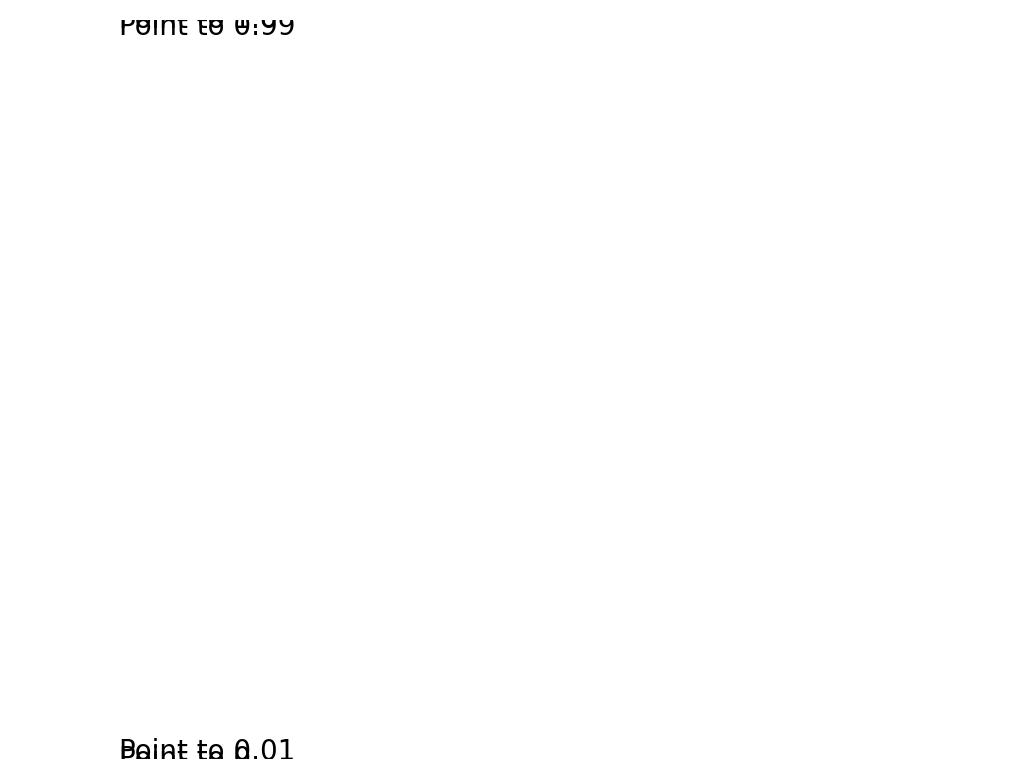

In [123]:
fig, ax = plt.subplots()
x = 0.1
points = [0, 0.01, 0.99, 1.0]
texts = [ml.AdjustableText(x, i, f"Point to {i}", ax=ax, pointer=(0, i), orient="right") for i in points]
ax.set_axis_off()


0.1 0.019886363636363646 (0, 0)
0.1 0.05965909090909094 (0, 0.01)
0.1 0.940340909090909 (0, 0.99)
0.1 0.9801136363636365 (0, 1.0)


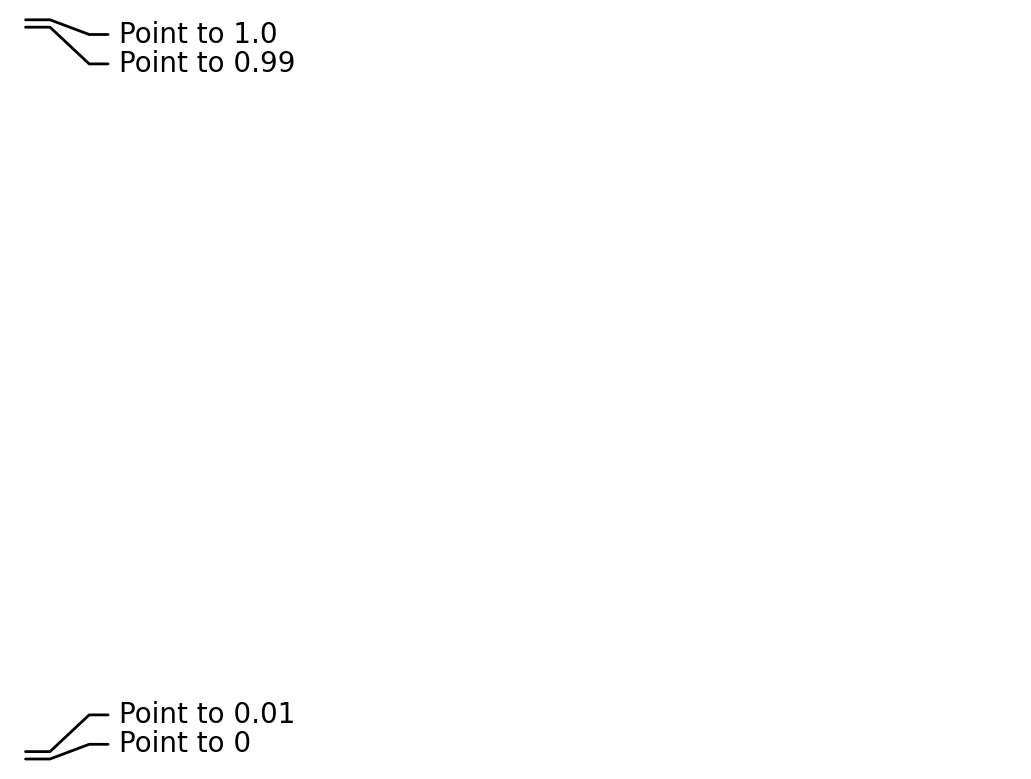

In [124]:
renderer = fig.canvas.get_renderer()
ax_bbox = ax.get_window_extent(renderer)
lim = ml.Segment(ax_bbox.ymin, ax_bbox.ymax)
segments = [t.get_segment_y() for t in texts]
adj_segments = ml.adjust_segments(lim, segments)

for t, s in zip(texts, adj_segments):
    t.set_display_y(s.mid)
    t.draw_annotate()
fig

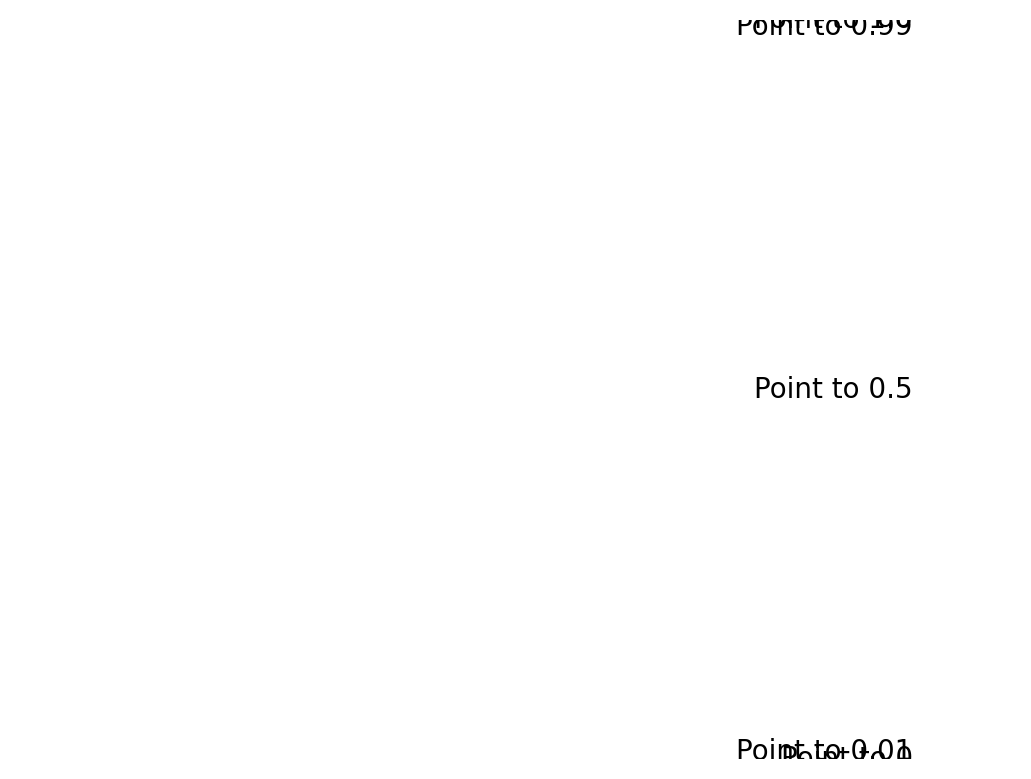

In [179]:
fig, ax = plt.subplots()
x = 0.1
points = [0, 0.01, 0.5, 0.99, 1.0]
texts = [ml.AdjustableText(x, i, f"Point to {i}", ax=ax, pointer=(0, i), orient="left") for i in points]
ax.set_axis_off()
ax.set_ylim(0, 1.0)
ax.invert_xaxis()

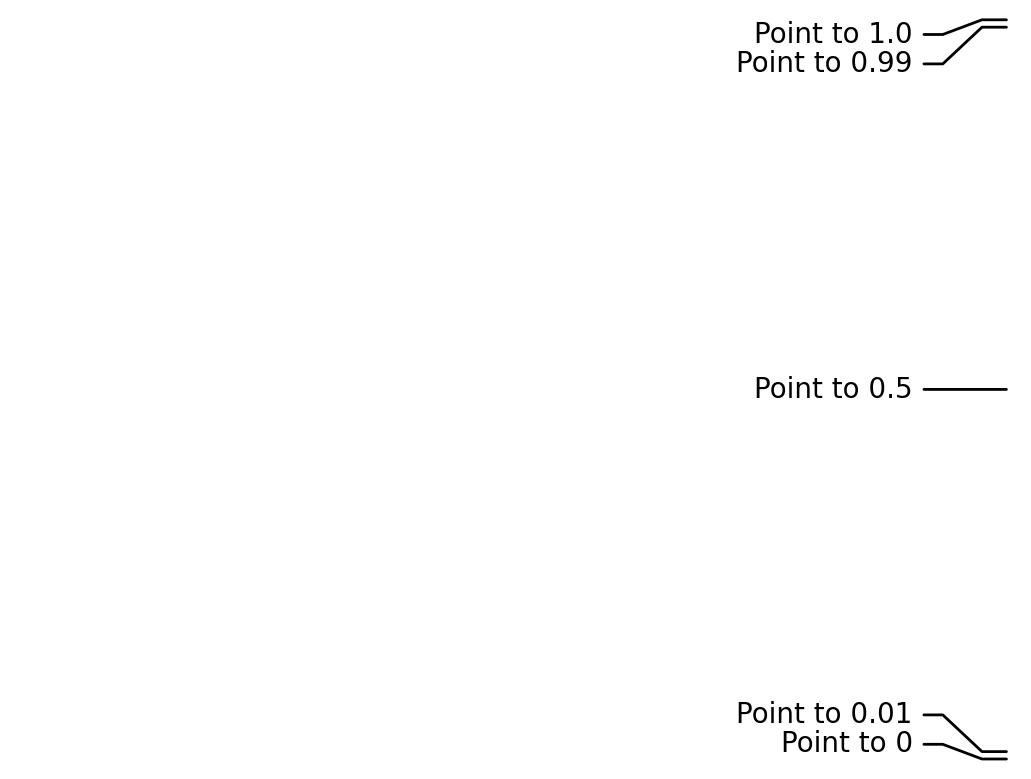

In [180]:
renderer = fig.canvas.get_renderer()
ax_bbox = ax.get_window_extent(renderer)
lim = ml.Segment(ax_bbox.ymin, ax_bbox.ymax)
segments = [t.get_segment_y() for t in texts]
adj_segments = ml.adjust_segments(lim, segments)

for t, s in zip(texts, adj_segments):
    t.set_display_y(s.mid)
    t.draw_annotate()
fig

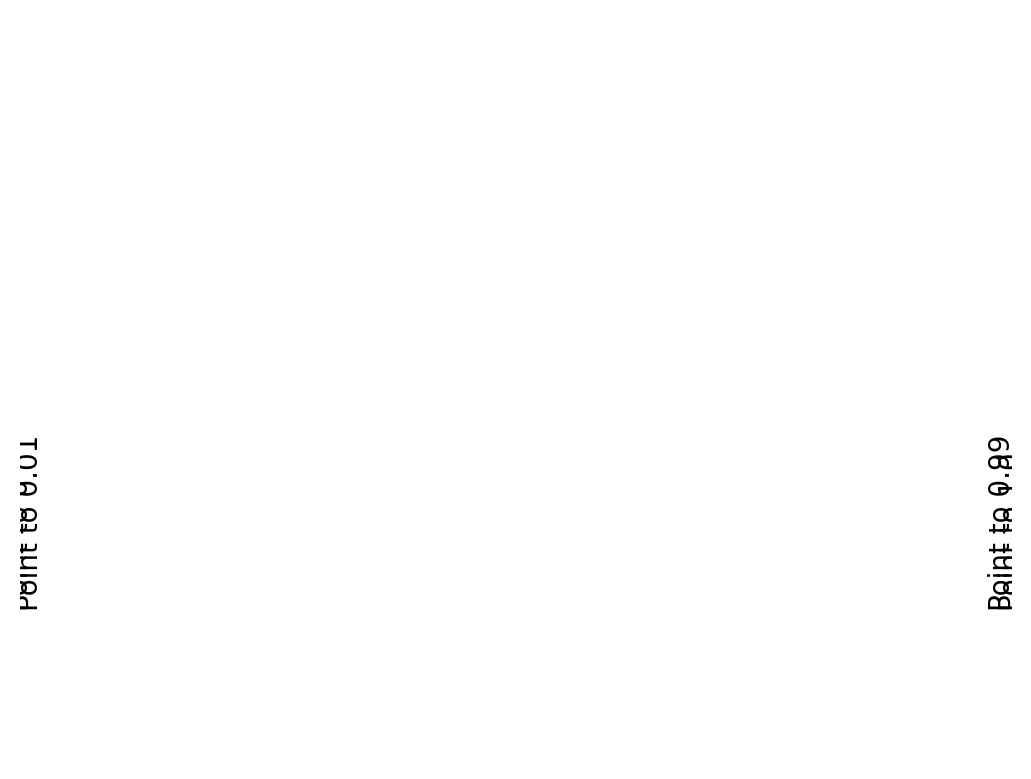

In [155]:
fig, ax = plt.subplots()
y = 0.2
points = [0, 0.01, 0.99, 1.0]
texts = [ml.AdjustableText(i, y, f"Point to {i}", ax=ax, pointer=(i, 0), orient="top") for i in points]
ax.set_axis_off()

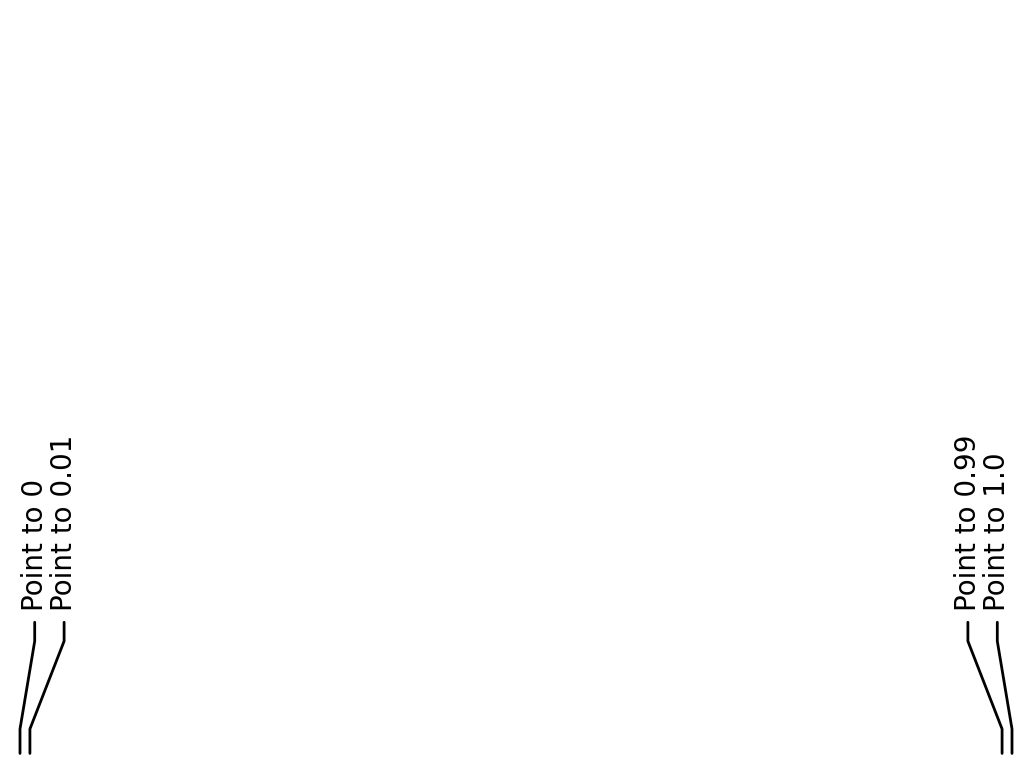

In [156]:
renderer = fig.canvas.get_renderer()
ax_bbox = ax.get_window_extent(renderer)
lim = ml.Segment(ax_bbox.xmin, ax_bbox.xmax)
segments = [t.get_segment_x() for t in texts]
adj_segments = ml.adjust_segments(lim, segments)

for t, s in zip(texts, adj_segments):
    t.set_display_x(s.mid)
    t.draw_annotate()
fig

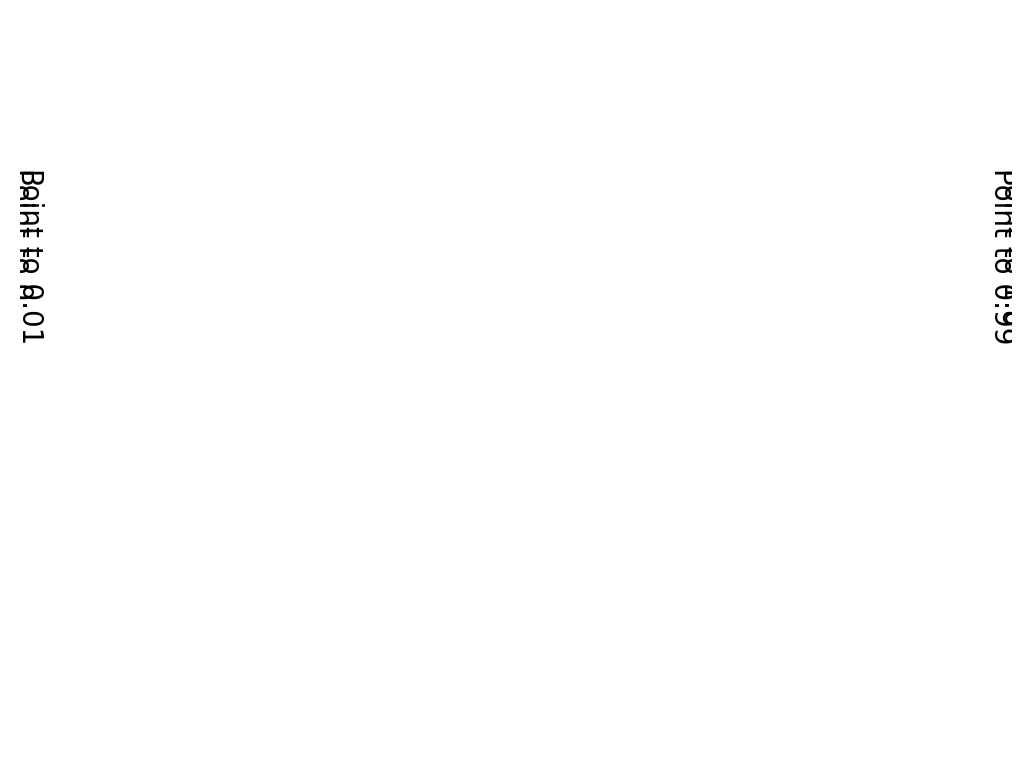

In [187]:
fig, ax = plt.subplots()
y = 0.2
points = [0, 0.01, 0.99, 1.0]
texts = [ml.AdjustableText(i, y, f"Point to {i}", ax=ax, pointer=(i, 0), orient="bottom") for i in points]
ax.set_axis_off()
ax.invert_yaxis()

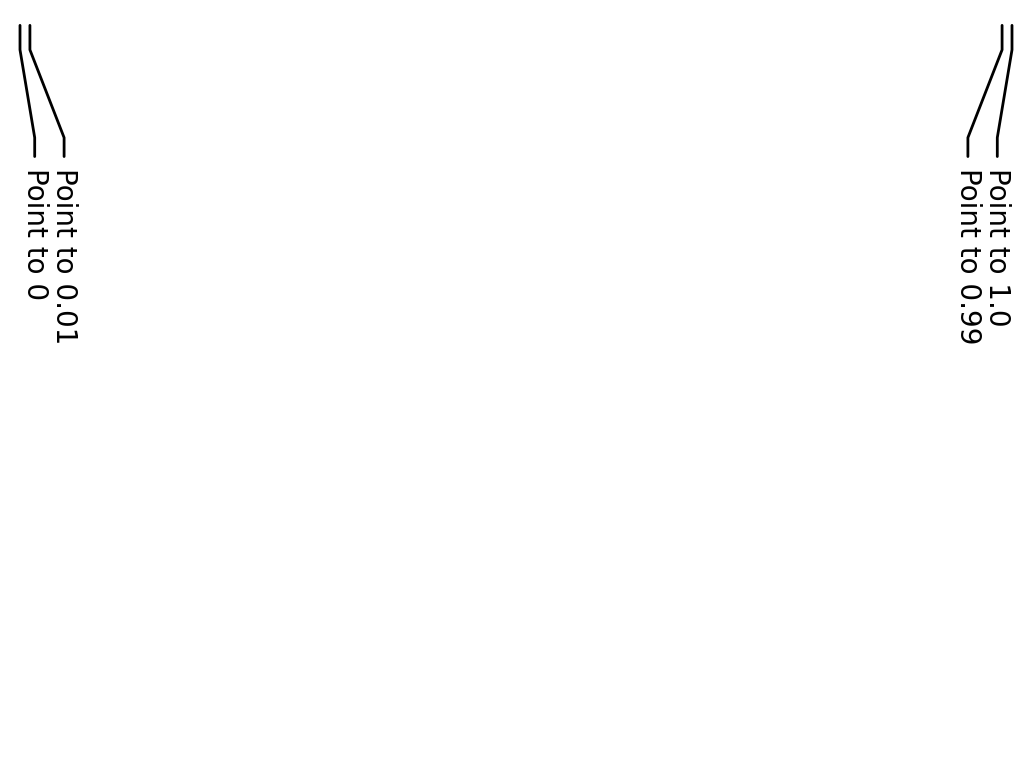

[Errno 13] Permission denied: 'C:\\Users\\Milk\\Projects\\heatgraphy\\marklabel.py'
spec not found for the module 'marklabel'
spec not found for the module 'marklabel'
spec not found for the module 'marklabel'


In [188]:
renderer = fig.canvas.get_renderer()
ax_bbox = ax.get_window_extent(renderer)
lim = ml.Segment(ax_bbox.xmin, ax_bbox.xmax)
segments = [t.get_segment_x() for t in texts]
adj_segments = ml.adjust_segments(lim, segments)

for t, s in zip(texts, adj_segments):
    t.set_display_x(s.mid)
    t.draw_annotate()
fig